<a href="https://colab.research.google.com/github/NizamuddinMandekar/CognifyzTechnologies_ML-Internship/blob/main/Restaurant_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

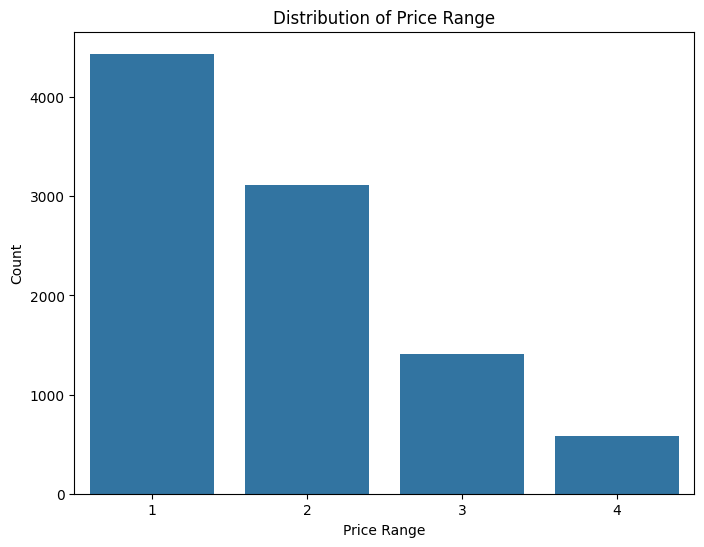

Top 5 Recommended Restaurants based on Sample User Preferences:
Empty DataFrame
Columns: [Restaurant Name, Cuisines, City, Price range]
Index: []


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load the dataset
restaurant_data = pd.read_csv("/content/drive/MyDrive/CognifyzTechnologies_ML-Internship/Dataset .csv")

restaurant_data.dropna(inplace=True)

restaurant_data['features'] = restaurant_data['Cuisines'] + ' ' + restaurant_data['City']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(restaurant_data['features'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def recommend_restaurants(user_preferences, cosine_sim=cosine_sim):

    filtered_restaurants = restaurant_data.copy()
    for criterion, value in user_preferences.items():
        if criterion in filtered_restaurants.columns:
            filtered_restaurants = filtered_restaurants[filtered_restaurants[criterion] == value]

    indices = filtered_restaurants.index.tolist()

    sim_scores = list(enumerate(cosine_sim[indices]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_indices = [x[0] for x in sim_scores[1:6]]
    recommendations = restaurant_data.iloc[top_indices]

    return recommendations

plt.figure(figsize=(8, 6))
sns.countplot(data=restaurant_data, x='Price range')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

sample_preferences = {
    'Cuisines': 'Italian',
    'Price range': 2,
    'City': 'New York'
}

sample_recommendations = recommend_restaurants(sample_preferences)
print("Top 5 Recommended Restaurants based on Sample User Preferences:")
print(sample_recommendations[['Restaurant Name', 'Cuisines', 'City', 'Price range']])


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
